# Quick and dirty plots with xarray – bottom topography

In [1]:
import xarray as xr
%matplotlib inline

In [2]:
#
# Read the ROMS data file into an xarray Dataset,
# and extract the bathymetry
#
A = xr.open_dataset('ocean_avg_0014.nc')
H = A.h.where(A.mask_rho > 0)   # Mask out land

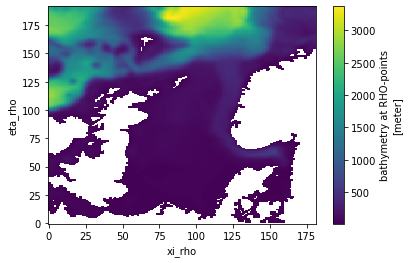

In [3]:
#
# Make a quick and dirty plot of the bathymetry
#
H.plot()

## Improve the plot

No topographic details are visible in the main area, the shallow North Sea.
To improve on that, choose a set of uneven discrete levels with shallow emphasis.
Adding the contour lines makes the levels stand out even more.

Set the axis to image to get the correct aspect ratio. This is done by
the method `axes.axis` on the QuadMesh plot object. Alternatively, it can be done by
importing `matplotlib.pyplot` as `plt` and issuing the statement `plt.axis('image')`

The final semicolon supresses the print out of the unnecessary axis limits.

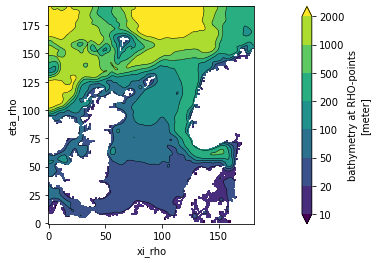

In [4]:
levels = [10, 20, 50, 100, 200, 500, 1000, 2000]
p = H.plot(levels=levels)
H.plot.contour(levels=levels, colors='black', linewidths=0.5)
p.axes.axis('image');

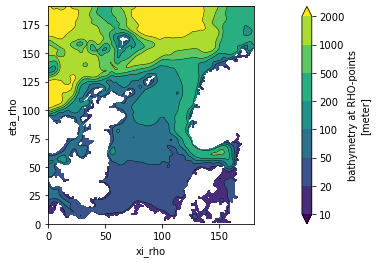

In [5]:
# Contourf is an alternative
# Note the inconsistency, on an QuadContourSet use ax.axis to set the axis parameters.
p = H.plot.contourf(levels=levels)
H.plot.contour(levels=levels, colors='black', linewidths=0.5)
p.axes.axis('image');

The choice of colours can be improved. For bathymetry it is natural to use
shades of blue, darker in deep waters. The `Blues` colormap is suitable for that.


A poor man's coastline can be obtained as the 0.5 contour line of the land mask,
`mask_rho`. To get a nice green colour on land, a solution is to plot the land mask with `levels=[1]`.

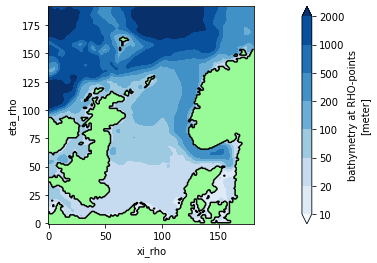

In [6]:
p = H.plot.contourf(levels=levels, cmap='Blues')   # Filled contour plot
M = A.mask_rho
# Put a green colour on land
M.plot(levels=[1], colors='PaleGreen', add_colorbar=False)
# Coast line
M.plot.contour(levels=[0.5], colors='black')

p.axes.axis('image');

The package `cmocean` has a nice set of colour maps,
see https://matplotlib.org/cmocean/.
The `deep` map is designed for bathymetry. 
As this map uses some greenish colours,
a grey colour can be used on land.

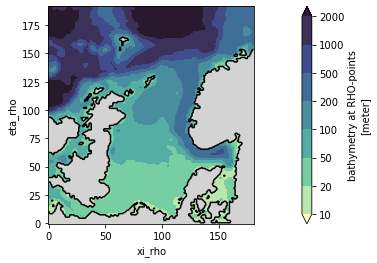

In [7]:
import cmocean
p = H.plot(levels=levels, cmap=cmocean.cm.deep)
M = A.mask_rho
# Put a nice grey colour on land
M.plot(levels=[1], colors='LightGrey', add_colorbar=False)
# Coast line
M.plot.contour(levels=[0.5], colors='black')

p.axes.axis('image');